In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [32]:
loansdata=pd.read_csv('C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Hypothesis/LoansData.csv')

In [33]:
loansdata

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [34]:
loansdata.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [35]:
loansdata.columns=loansdata.columns.str.replace(".","_")

C:\Users\jmd\AppData\Local\Temp/ipykernel_15032/406953295.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loansdata.columns=loansdata.columns.str.replace(".","_")


In [36]:
loansdata.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

In [37]:
loansdata.Interest_Rate=loansdata.Interest_Rate.str.replace("%"," ").astype(float)

In [38]:
loansdata.Loan_Length=loansdata.Loan_Length.str.replace("months"," ").astype(int)

In [39]:
loansdata.Debt_To_Income_Ratio=loansdata.Debt_To_Income_Ratio.str.replace("%"," ").astype(float)

In [40]:
fico_range=loansdata.FICO_Range.str.split("-",expand=True)

In [41]:
fico_avg=(fico_range[0].astype(float)+fico_range[1].astype(float))/2

In [42]:
loansdata["fico_avg"]=fico_avg

In [43]:
loansdata.drop(axis=1,columns="FICO_Range",inplace=True)

In [44]:
loansdata.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int32
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
fico_avg                          float64
dtype: object

In [45]:
loansdata.isna().sum()

Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
fico_avg                           2
dtype: int64

In [46]:
loansdata["Amount_Requested"]=loansdata.Amount_Requested.fillna(loansdata.Amount_Requested.mean())
loansdata["Amount_Funded_By_Investors"]=loansdata.Amount_Funded_By_Investors.fillna(loansdata.Amount_Funded_By_Investors.mean())
loansdata["Interest_Rate"]=loansdata.Interest_Rate.fillna(loansdata.Interest_Rate.mean())
loansdata["Debt_To_Income_Ratio"]=loansdata.Debt_To_Income_Ratio.fillna(loansdata.Debt_To_Income_Ratio.mean())
loansdata["Monthly_Income"]=loansdata.Home_Ownership.fillna(loansdata.Monthly_Income.mean())
loansdata["Open_CREDIT_Lines"]=loansdata.Open_CREDIT_Lines.fillna(loansdata.Open_CREDIT_Lines.mean())
loansdata["Revolving_CREDIT_Balance"]=loansdata.Revolving_CREDIT_Balance.fillna(loansdata.Revolving_CREDIT_Balance.mean())
loansdata["Inquiries_in_the_Last_6_Months"]=loansdata.Inquiries_in_the_Last_6_Months.fillna(loansdata.Inquiries_in_the_Last_6_Months.mean())
loansdata["fico_avg"]=loansdata.fico_avg.fillna(loansdata.fico_avg.mean())
loansdata.dropna(axis=0,subset=["Home_Ownership"],inplace=True)

In [47]:
loansdata.drop(axis=1,columns="Employment_Length",inplace=True)

In [48]:
loansdata.isna().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
State                             0
Home_Ownership                    0
Monthly_Income                    0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
fico_avg                          0
dtype: int64

In [49]:
# After removing misings
loansdata

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,fico_avg
0,20000.0,20000.00,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,MORTGAGE,14.0,14272.0,2.0,737.0
1,19200.0,19200.00,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,MORTGAGE,12.0,11140.0,1.0,717.0
2,35000.0,35000.00,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,MORTGAGE,14.0,21977.0,1.0,692.0
3,10000.0,9975.00,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,MORTGAGE,10.0,9346.0,0.0,697.0
4,12000.0,12000.00,11.71,36,credit_card,18.78,NJ,RENT,RENT,11.0,14469.0,0.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77,60,debt_consolidation,19.23,NY,MORTGAGE,MORTGAGE,15.0,45880.0,1.0,707.0
2496,16000.0,16000.00,14.09,60,home_improvement,21.54,MD,OWN,OWN,18.0,18898.0,1.0,742.0
2497,10000.0,10000.00,13.99,36,debt_consolidation,4.89,PA,MORTGAGE,MORTGAGE,4.0,4544.0,0.0,682.0
2498,6000.0,6000.00,12.42,36,major_purchase,16.66,NJ,RENT,RENT,8.0,7753.0,0.0,677.0


In [50]:
loansdata["highlow"]=np.where(loansdata.Amount_Funded_By_Investors>15000,"high","low")

In [51]:
loansdata

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,fico_avg,highlow
0,20000.0,20000.00,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,MORTGAGE,14.0,14272.0,2.0,737.0,high
1,19200.0,19200.00,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,MORTGAGE,12.0,11140.0,1.0,717.0,high
2,35000.0,35000.00,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,MORTGAGE,14.0,21977.0,1.0,692.0,high
3,10000.0,9975.00,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,MORTGAGE,10.0,9346.0,0.0,697.0,low
4,12000.0,12000.00,11.71,36,credit_card,18.78,NJ,RENT,RENT,11.0,14469.0,0.0,697.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77,60,debt_consolidation,19.23,NY,MORTGAGE,MORTGAGE,15.0,45880.0,1.0,707.0,high
2496,16000.0,16000.00,14.09,60,home_improvement,21.54,MD,OWN,OWN,18.0,18898.0,1.0,742.0,high
2497,10000.0,10000.00,13.99,36,debt_consolidation,4.89,PA,MORTGAGE,MORTGAGE,4.0,4544.0,0.0,682.0,low
2498,6000.0,6000.00,12.42,36,major_purchase,16.66,NJ,RENT,RENT,8.0,7753.0,0.0,677.0,low


## Solution 1

### 1(a)

In [52]:
data=loansdata.groupby("highlow")[["Amount_Funded_By_Investors","Interest_Rate"]].mean()

In [53]:
data

,Amount_Funded_By_Investors,Interest_Rate
highlow,,
high,22338.217244,15.221674
low,8039.424648,12.239629


In [55]:
h=loansdata[loansdata.highlow=="high"].Interest_Rate
l=loansdata[loansdata.highlow=="low"].Interest_Rate

In [56]:
stats.ttest_ind(h,l)

Ttest_indResult(statistic=16.863002684075262, pvalue=1.654363135086438e-60)

### P value is very low so we reject null hypothesis.Interest rate is varied for different loan amounts, Less interest rate is charged for the high loan amount values.


### 1(b)

In [57]:
stats.pearsonr( loansdata.Loan_Length,loansdata.Interest_Rate )

(0.4240875164854208, 1.176435099210308e-109)

### Correlation value is greater than 0.4 and hence we can conclude that loan length is directly effecting interest rate

### 1(c)

In [58]:
loansdata.Loan_Purpose.value_counts()

debt_consolidation    1306
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [59]:
cat=pd.DataFrame(loansdata.groupby("Loan_Purpose").Interest_Rate.mean())
cat

,Interest_Rate
Loan_Purpose,
car,11.113000
credit_card,13.050688
debt_consolidation,13.589602
educational,11.007333
home_improvement,11.594276
house,13.448000
major_purchase,10.797822
medical,11.649667
moving,13.621034


In [62]:
p1 = loansdata.loc[ loansdata.Loan_Purpose == "car","Interest_Rate"]
p2  = loansdata.loc[ loansdata.Loan_Purpose =="credit_card","Interest_Rate"]
p3  = loansdata.loc[ loansdata.Loan_Purpose =="debt_consolidation","Interest_Rate"]
p4 = loansdata.loc[ loansdata.Loan_Purpose == "educational","Interest_Rate"]
p5 = loansdata.loc[ loansdata.Loan_Purpose == "home_improvement","Interest_Rate"]
p6 = loansdata.loc[ loansdata.Loan_Purpose == "house","Interest_Rate"]
p7 = loansdata.loc[ loansdata.Loan_Purpose == "major_purchase" ,"Interest_Rate"]
p8 = loansdata.loc[ loansdata.Loan_Purpose == "medical","Interest_Rate"]
p9 = loansdata.loc[ loansdata.Loan_Purpose == "moving","Interest_Rate"]
p10 = loansdata.loc[ loansdata.Loan_Purpose =="other","Interest_Rate"]
p11 = loansdata.loc[ loansdata.Loan_Purpose =="renewable_energy","Interest_Rate"]
p12 = loansdata.loc[ loansdata.Loan_Purpose =="small_business","Interest_Rate"]
p13  = loansdata.loc[ loansdata.Loan_Purpose =="vacation","Interest_Rate"]
p14  = loansdata.loc[ loansdata.Loan_Purpose =="wedding","Interest_Rate"]                   

In [63]:
stats.f_oneway(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14)

F_onewayResult(statistic=7.497292461482286, pvalue=1.0694426684011573e-14)

### As p value is very low so we reject null hypothesis and it can be concluded that all the sample means are different and hence interest rate is different for different purposes of loans.

### 1(d)

In [66]:
loansdata.groupby("Home_Ownership").fico_avg.mean()

Home_Ownership
MORTGAGE    713.692158
NONE        802.000000
OTHER       674.000000
OWN         708.550000
RENT        702.061871
Name: fico_avg, dtype: float64

In [67]:
t1 = loansdata.loc[ loansdata.Home_Ownership == "MORTGAGE","fico_avg"]
t2 = loansdata.loc[ loansdata.Home_Ownership == "NONE","fico_avg"]
t3 = loansdata.loc[ loansdata.Home_Ownership == "OTHER","fico_avg"]
t4 = loansdata.loc[ loansdata.Home_Ownership == "OWN","fico_avg"]
t5 = loansdata.loc[ loansdata.Home_Ownership == "RENT","fico_avg"]

In [68]:
stats.f_oneway(t1,t2,t3,t4,t5)

F_onewayResult(statistic=19.335476696656727, pvalue=1.1120270931401884e-15)

### P value is low hence all the home ownerships don't have same fico scores.

## Solution 2

In [69]:
mary=pd.read_csv('C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Hypothesis/Price_Quotes.csv')

In [70]:
mary

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [71]:
stats.ttest_ind( mary.Barry_Price, mary.Mary_Price )

Ttest_indResult(statistic=1.4147436739281787, pvalue=0.17114226132118285)

### P value is high so we fail to reject null hypothesis.Hence, there is no appreciable difference in average price quotes calculated by mary and barry

## Solution 3

In [72]:
treatment=pd.read_csv('C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Hypothesis/Treatment_Facility.csv')

In [73]:
treatment.head(2)

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452


In [74]:
prepost=treatment.groupby("Reengineer")[["Employee_Turnover","VAR4","VAR5"]].mean().reset_index()
prepost

,Reengineer,Employee_Turnover,VAR4,VAR5
0,Post,18.689129,9.232042,23.349719
1,Prior,11.735692,20.540335,53.887906


In [81]:
trepre=treatment[treatment.Reengineer=="Prior"]
trepost=treatment[treatment.Reengineer=="Post"]

In [82]:
trepre.Employee_Turnover.mean()

11.735692307692307

In [83]:
trepost.Employee_Turnover.mean()

18.68912857142857

In [85]:
stats.ttest_ind(trepre.Employee_Turnover,trepost.Employee_Turnover)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

 ### P value is low, we can say that with 10% confidence that there is a significant change in prior and post Employee turnover. It has increased from last time.

In [86]:
stats.ttest_ind(trepre.VAR5,trepost.VAR5)

Ttest_indResult(statistic=1.6279144253528646, pvalue=0.12091989189884149)

### As the p value is high, we can say that with 10% confidence that there is no significant change in prior and post Critical Incidence.

## Solution 4

In [89]:
pri=pd.read_csv('C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Hypothesis/Priority_Assessment.csv')

In [90]:
pri

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [91]:
pri.groupby("Priority").Days.mean()

Priority
High      3.023620
Low       4.228358
Medium    2.500000
Name: Days, dtype: float64

In [92]:
p1 = pri.loc[ pri.Priority == "High","Days"]
p2 = pri.loc[ pri.Priority == "Low","Days"]
p3 = pri.loc[ pri.Priority == "Medium","Days"]

In [93]:
stats.f_oneway(p1,p2,p3)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

### P value is high, we fail to reject null hypothesis.

## Solution 5

In [115]:
films=pd.read_csv('C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Hypothesis/Films.csv')

In [116]:
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [96]:
films.dtypes

_rowstate_          int64
Movie              object
Gender             object
Marital_Status     object
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age               float64
Income            float64
Hear_About         object
dtype: object

In [97]:
films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [98]:
films.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [99]:
films.Marital_Status.fillna(films.Marital_Status.mode())
films.Marital_Status=films.Marital_Status.replace("Slngle","Single")

In [100]:
films.Marital_Status.value_counts()

2          208
1           88
Single      20
Married     12
Name: Marital_Status, dtype: int64

In [101]:
films["Marital_Status"]=np.where((films.Marital_Status==2)|(films.Marital_Status=="Married"),"Married","Single")

In [102]:
films["Gender"]=np.where((films.Gender==1)|(films.Gender=="Male"),"Male","Female")

In [103]:
films.Marital_Status.nunique()

2

In [104]:
films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     0
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [105]:
films.Income.mode()

0    1.0
dtype: float64

In [106]:
films["Income"]=films.Income.fillna(films["Income"].mode()[0])

In [107]:
films["Overall"]=films.Overall.fillna(films["Overall"].mode()[0])
films["Sinage"]=films.Sinage.fillna(films["Sinage"].mode()[0])
films["Clean"]=films.Clean.fillna(films["Clean"].mode()[0])
films["Age"]=films.Age.fillna(films["Age"].mode()[0])
films["Parking"]=films.Parking.fillna(films["Parking"].mode()[0])
films["Hear_About"]=films.Hear_About.fillna(films["Hear_About"].mode()[0])



In [108]:
films.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

In [109]:
films.drop(axis=1,columns="_rowstate_",inplace=True)

In [110]:
cust_sat_perc=((films.groupby("Overall").Overall.agg("count"))/films.shape[0])*100

In [111]:
lst=["Sinage","Clean","Parking","Age","Income","Overall"]

In [112]:
films.corr()

,Sinage,Parking,Clean,Overall,Age,Income
Sinage,1.000000,0.469180,0.349144,0.382103,-0.089461,-0.021023
Parking,0.469180,1.000000,0.440771,0.514429,-0.023468,-0.011247
Clean,0.349144,0.440771,1.000000,0.350822,-0.000114,0.007797
Overall,0.382103,0.514429,0.350822,1.000000,-0.032904,-0.014450
Age,-0.089461,-0.023468,-0.000114,-0.032904,1.000000,0.134726
Income,-0.021023,-0.011247,0.007797,-0.014450,0.134726,1.000000


In [113]:
films.groupby(["Gender","Marital_Status"]).Overall.mean().reset_index()

,Gender,Marital_Status,Overall
0,Female,Married,1.666667
1,Female,Single,1.601286
2,Male,Married,1.666667
3,Male,Single,2.428571


In [179]:
films.groupby("Hear_About").Gender.agg("count")

Hear_About
1       22
1,5      1
2       12
2,5      2
3       14
3,4      2
3,5      1
4       41
4,5      1
5      233
5,4      1
Name: Gender, dtype: int64

### 5(a)

In [118]:
films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [119]:
films =films.dropna(axis = 0, how ='any')

In [120]:
films.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

In [122]:
film_satisfaction = round(films['Overall'].mean(),4)
print("Overall level of film satisfaction is:",film_satisfaction)

Overall level of film satisfaction is: 1.6213


### 5(b)

In [124]:
films.Clean.value_counts()

2.0    138
1.0    134
3.0     22
4.0      5
5.0      2
Name: Clean, dtype: int64

In [125]:
clean_factor = pd.crosstab(films.Clean, films.Overall,margins=True)
clean_factor

Overall,1.0,2.0,3.0,4.0,5.0,All
Clean,,,,,,
1.0,96,34,3,0,1,134
2.0,35,96,5,1,1,138
3.0,4,14,4,0,0,22
4.0,1,4,0,0,0,5
5.0,1,0,0,0,1,2
All,137,148,12,1,3,301


In [126]:
test_1 = stats.chi2_contingency(observed= clean_factor)
test_1

(129.0342392337068,
 5.484923462041104e-16,
 25,
 array([[6.09900332e+01, 6.58870432e+01, 5.34219269e+00, 4.45182724e-01,
         1.33554817e+00, 1.34000000e+02],
        [6.28106312e+01, 6.78538206e+01, 5.50166113e+00, 4.58471761e-01,
         1.37541528e+00, 1.38000000e+02],
        [1.00132890e+01, 1.08172757e+01, 8.77076412e-01, 7.30897010e-02,
         2.19269103e-01, 2.20000000e+01],
        [2.27574751e+00, 2.45847176e+00, 1.99335548e-01, 1.66112957e-02,
         4.98338870e-02, 5.00000000e+00],
        [9.10299003e-01, 9.83388704e-01, 7.97342193e-02, 6.64451827e-03,
         1.99335548e-02, 2.00000000e+00],
        [1.37000000e+02, 1.48000000e+02, 1.20000000e+01, 1.00000000e+00,
         3.00000000e+00, 3.01000000e+02]]))

In [127]:
print("The chi square stat is {} and the p value is {}".format(test_1[0],test_1[1]))

The chi square stat is 129.0342392337068 and the p value is 5.484923462041104e-16


### Since it is observed that p-value is less than 0.05, then we can say that 'Clean' factor has an impact on Satisfaction.

In [135]:
# for sinage
films.Sinage.value_counts()

2.0    140
1.0    105
3.0     45
4.0      6
5.0      5
Name: Sinage, dtype: int64

In [136]:
sinage_factor = pd.crosstab(films.Sinage, films.Overall,margins=True)
sinage_factor

Overall,1.0,2.0,3.0,4.0,5.0,All
Sinage,,,,,,
1.0,83,22,0,0,0,105
2.0,38,97,4,0,1,140
3.0,12,23,8,1,1,45
4.0,2,4,0,0,0,6
5.0,2,2,0,0,1,5
All,137,148,12,1,3,301


In [137]:
test_2 = stats.chi2_contingency(observed= sinage_factor)
test_2

(121.32462033201085,
 1.2922844322850256e-14,
 25,
 array([[4.77906977e+01, 5.16279070e+01, 4.18604651e+00, 3.48837209e-01,
         1.04651163e+00, 1.05000000e+02],
        [6.37209302e+01, 6.88372093e+01, 5.58139535e+00, 4.65116279e-01,
         1.39534884e+00, 1.40000000e+02],
        [2.04817276e+01, 2.21262458e+01, 1.79401993e+00, 1.49501661e-01,
         4.48504983e-01, 4.50000000e+01],
        [2.73089701e+00, 2.95016611e+00, 2.39202658e-01, 1.99335548e-02,
         5.98006645e-02, 6.00000000e+00],
        [2.27574751e+00, 2.45847176e+00, 1.99335548e-01, 1.66112957e-02,
         4.98338870e-02, 5.00000000e+00],
        [1.37000000e+02, 1.48000000e+02, 1.20000000e+01, 1.00000000e+00,
         3.00000000e+00, 3.01000000e+02]]))

In [138]:
print("The chi square stat is {} and the p value is {}".format(test_2[0],test_2[1]))

The chi square stat is 121.32462033201085 and the p value is 1.2922844322850256e-14


### Since it is observed that p-value is less than 0.05, then we can say that 'Sinage' factor has an impact on Satisfaction. 

In [140]:
# for parking
films.Parking.value_counts()

2.0    139
1.0    122
3.0     29
4.0      7
5.0      4
Name: Parking, dtype: int64

In [142]:
parking_factor = pd.crosstab(films.Parking, films.Overall,margins=True)
parking_factor

Overall,1.0,2.0,3.0,4.0,5.0,All
Parking,,,,,,
1.0,95,25,2,0,0,122
2.0,36,99,3,0,1,139
3.0,4,20,5,0,0,29
4.0,2,3,1,0,1,7
5.0,0,1,1,1,1,4
All,137,148,12,1,3,301


In [143]:
test_3 = stats.chi2_contingency(observed= parking_factor)
test_3

(218.79348282085002,
 7.07379320798715e-33,
 25,
 array([[5.55282392e+01, 5.99867110e+01, 4.86378738e+00, 4.05315615e-01,
         1.21594684e+00, 1.22000000e+02],
        [6.32657807e+01, 6.83455150e+01, 5.54152824e+00, 4.61794020e-01,
         1.38538206e+00, 1.39000000e+02],
        [1.31993355e+01, 1.42591362e+01, 1.15614618e+00, 9.63455150e-02,
         2.89036545e-01, 2.90000000e+01],
        [3.18604651e+00, 3.44186047e+00, 2.79069767e-01, 2.32558140e-02,
         6.97674419e-02, 7.00000000e+00],
        [1.82059801e+00, 1.96677741e+00, 1.59468439e-01, 1.32890365e-02,
         3.98671096e-02, 4.00000000e+00],
        [1.37000000e+02, 1.48000000e+02, 1.20000000e+01, 1.00000000e+00,
         3.00000000e+00, 3.01000000e+02]]))

In [144]:
print("The chi square stat is {} and the p value is {}".format(test_3[0],test_3[1]))

The chi square stat is 218.79348282085002 and the p value is 7.07379320798715e-33


### Since it is observed that p-value is less than 5%, then we can say that 'Parking' factor has an impact on Satisfaction. 

### Hence we can conclude that 'Sinage','Clean','Parking' factors are linked to Satisfaction.

### 5(c)

In [146]:
income_group = films.Income.value_counts()
income_group

1.0    135
3.0     86
2.0     80
Name: Income, dtype: int64

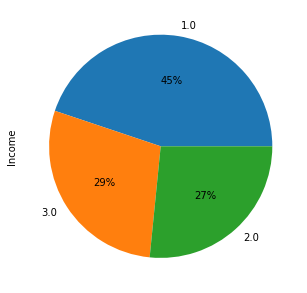

In [149]:
plt.figure(figsize=(5,8))
income_group.plot(kind = 'pie', autopct = "%1.0f%%")
plt.show()

In [178]:
# There are 45% people with Income Group 1 (Less than $50,000).
# There are 26% people with Income Group 2 ($50,000 - $100,000).
# There are 29% people with Income Group 3 ($100,000+).

In [156]:
Age_group = films.Age.value_counts()
Age_group

2.0    164
3.0    108
1.0     22
4.0      7
Name: Age, dtype: int64

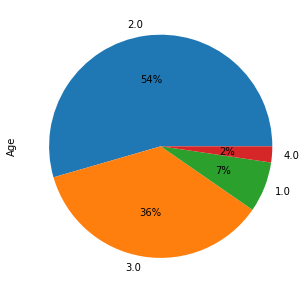

In [158]:
plt.figure(figsize=(5,10))
Age_group.plot(kind = 'pie', autopct = "%1.0f%%")
plt.show()

In [179]:
# There are 53% people with Age Group 2 (i.e age between 13-30).
# There are 36% people with Age Group 3 (i.e age between 31-60).
# There are 8% people with Age Group 1 (i.e age between 1-12).
# There are 3% people with Age Group 4 (i.e age 60+ years).

In [180]:
films['Gender_m'] = np.where(films['Gender'] == "Male", 1, 0)
films.head()

C:\Users\jmd\AppData\Local\Temp/ipykernel_15032/3740262443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films['Gender_m'] = np.where(films['Gender'] == "Male", 1, 0)


,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About,Gender_1,Gender_m,Marital_Status_1
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5,1,0,1
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5,1,0,0
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5,2,1,1
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5,1,0,1
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1,1,0,1


In [181]:
gender_group = films.Gender_m.value_counts()
gender_group

0    288
1     13
Name: Gender_m, dtype: int64

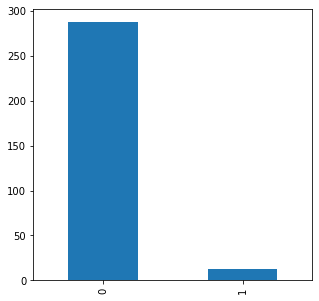

In [191]:
plt.figure(figsize=(5,5))
gender_group.plot(kind = 'bar')
plt.show()

In [185]:
# according to bar 80% are Females and 20% is male

In [186]:
films['Marital_Status_1'] = np.where(films['Marital_Status'] == "Married", 1, 0)
films.head()

C:\Users\jmd\AppData\Local\Temp/ipykernel_15032/3213913458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films['Marital_Status_1'] = np.where(films['Marital_Status'] == "Married", 1, 0)


,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About,Gender_1,Gender_m,Marital_Status_1
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5,1,0,1
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5,1,0,0
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5,2,1,1
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5,1,0,1
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1,1,0,1


In [187]:
marital_status_group = films["Marital_Status_1"].value_counts()
marital_status_group

0    290
1     11
Name: Marital_Status_1, dtype: int64

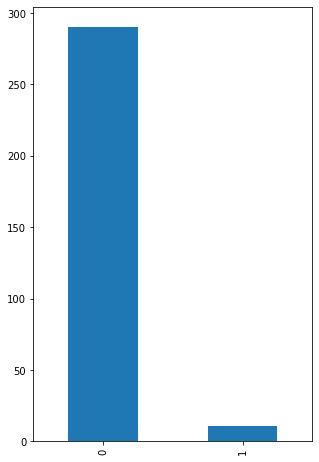

In [188]:
plt.figure(figsize=(5,8))
marital_status_group.plot(kind = 'bar')
plt.show()

In [195]:
# It has concluded that bar for 0 is high i.e. majority is Single.
# It has concluded that 1-30% are Married.

## 5(d)

In [193]:
Films_media = films.Hear_About.value_counts()
Films_media 

5      212
4       39
1       19
3       13
2       11
2,5      2
4,5      1
1,5      1
5,4      1
3,5      1
3,4      1
Name: Hear_About, dtype: int64

### It can be seen that most of the customers has came to watch a movie on the basis of 'WORD OF MOUTH'